In [ ]:
# pip install xgboost==2.1.2

## Regression

In [1]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

dmatrix = xgb.DMatrix(data=X, label=y)

# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")

grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params, scoring='r2',
                    cv=4, verbose=1)

grid.fit(X, y)
print("GridSearchCV")
print("Best parameters found: ", grid.best_params_)
print("Best R2_Score found: ", grid.best_score_)


# Random Search Parameters
params_random_search = {
    'learning_rate': np.arange(0.01, 1.01, 0.01),
    'n_estimators': [200],
    'max_depth': range(2, 12),
    'subsample': np.arange(0.02, 1.02, 0.02)
}


xg_random_reg = xgb.XGBRegressor(objective= "reg:squarederror")

randomized = RandomizedSearchCV(param_distributions=params_random_search, estimator=xg_random_reg,
                                    scoring="r2", n_iter=5, cv=4, verbose=1)
randomized.fit(X, y)

print("Randomize Search Cross Validation")
print("Best parameters found: ", randomized.best_params_)
print("Best R2_Score found: ", randomized.best_score_)


Fitting 4 folds for each of 72 candidates, totalling 288 fits
GridSearchCV
Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}
Best R2_Score found:  0.46153716022036007


- Total configurations in Grid Search → 2x4x1x3x3 = 72
- Total configurations in Random Search → 100x1x10x50 = 50000 But it will choose randomly 5 and get result

In [17]:
randomized.cv_results_

{'mean_fit_time': array([0.09249949, 0.09374833, 0.42449909, 0.09025067, 0.18850052]),
 'std_fit_time': array([0.00206262, 0.00082834, 0.01186395, 0.00192039, 0.00766484]),
 'mean_score_time': array([0.00299829, 0.00275004, 0.00350243, 0.00249982, 0.00250036]),
 'std_score_time': array([8.49235466e-07, 4.34499807e-04, 4.99309767e-04, 4.99368297e-04,
        4.99072061e-04]),
 'param_subsample': masked_array(data=[0.16, 0.76, 0.9600000000000001, 0.9600000000000001,
                    0.66],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'param_n_estimators': masked_array(data=[200, 200, 200, 200, 200],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_max_depth': masked_array(data=[3, 3, 9, 3, 11],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_learning_rate': masked_array(data=[0.7000000000000001, 0.49, 0.05, 0.67, 0.52],
              mask=[False, False, False, 

## Classification

accuracy: 75.409836


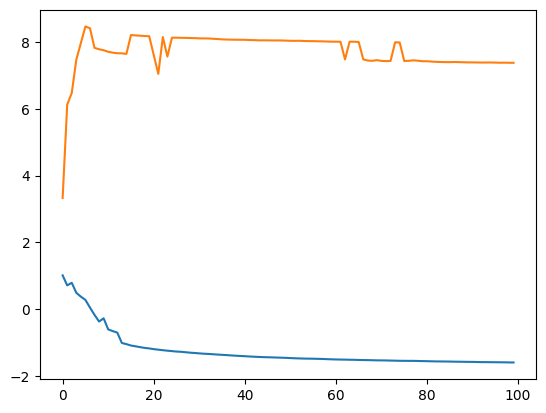

In [44]:
import numpy as np
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv('./Datasets/heart.csv', delimiter=",")

# Split data into X and y
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Spilt into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# XGB Classifier
xg_cl = xgb.XGBClassifier(objective='binary:logitraw', n_estimators=100, seed=123)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train, eval_set=eval_set, verbose=False)
results = xg_cl.evals_result()

# Predict the labels of the test set: preds
predictions = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

# plot classification error
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')